<a href="https://colab.research.google.com/github/samudraray/samudraray/blob/main/Python_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-0.0167577 -1.0970325381612115e-06


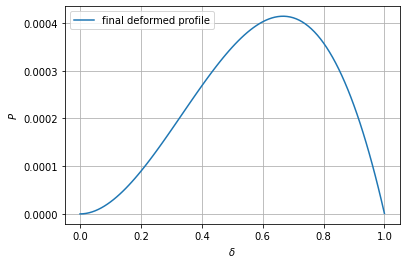

In [ ]:


from math import cos,sin,pi
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
Mmax=11.169599e-3  # this is maximum value of  M bar
Pmax=-16.7577e-3   # this is maximum value P bar 
nS=101  # no of nodes along the beam
h=1/(nS-1)  # the interval or distance between two nodes, the total length of beam is = 1  (no unit)
nT=101  # the number of total time instatnts t=0,1,2,...100
P=np.linspace(0,Pmax,nT) # this is P bar
M=np.linspace(0,Mmax,nT) # this is M bar
fd=np.linspace(0,0,10)   
Phi=np.zeros([nS,nT])
X=np.zeros([nS,nT])
Y=np.zeros([nS,nT])
tol=1e-8
# dphi=u(s)+c*v(s);u"+dP*cos(phi)-P*sin(phi)*u=0;u(0)=0,u'(0)=0
def fu(ph,n,Pn,dP,h): 
    u1=np.linspace(0,0,n)  
    u2=np.linspace(0,0,n)
    for i in range(1,n):
        
        m1=h*u2[i-1]
        th=ph[i-1]
        k1=Pn*sin(th)*u1[i-1]-dP*cos(th)
        k1=h*k1
        
        
        m2=h*(u2[i-1]+k1*0.5)
        th=0.5*(ph[i-1]+ph[i])
        k2=Pn*sin(th)*(u1[i-1]+m1*0.5)-dP*cos(th)
        k2=h*k2
        
        
        m3=h*(u2[i-1]+k2*0.5)
        #th=0.5*(ph[i-1]+ph[i])
        k3=Pn*sin(th)*(u1[i-1]+m2*0.5)-dP*cos(th)
        k3=h*k3
        
        
        m4=h*(u2[i-1]+k3)
        th=ph[i]
        k4=Pn*sin(th)*(u1[i-1]+m3)-dP*cos(th)
        k4=h*k4
        
        
        u1[i]=u1[i-1]+(1/6)*(m1+2*m2+2*m3+m4)
        u2[i]=u2[i-1]+(1/6)*(k1+2*k2+2*k3+k4)
        
    return u1,u2
# dphi=u(s)+c*v(s);v"-P*sin(phi)*v=0;v(0)=0,v'(0)=1
def fv(ph,n,Pn,h):
    v1=np.linspace(0,0,n)  
    v2=np.linspace(0,0,n)
    v2[0]=1
    for i in range(1,n):
        m1=h*v2[i-1]
        th=ph[i-1]
        k1=h*Pn*sin(th)*v1[i-1]
        
        m2=h*(v2[i-1]+0.5*k1)
        th=0.5*(ph[i-1]+ph[i])
        k2=h*(Pn*sin(th)*(v1[i-1]+0.5*m1))
        
        m3=h*(v2[i-1]+0.5*k2)
        #th=0.5*(ph[i-1]+ph[i])
        k3=h*(Pn*sin(th)*(v1[i-1]+0.5*m2))
        
        m4=h*(v2[i-1]+k3)
        th=ph[i]
        k4=h*(Pn*sin(th)*(v1[i-1]+m3))
        

        
        v1[i]=v1[i-1]+(1/6)*(m1+2*m2+2*m3+m4)
        v2[i]=v2[i-1]+(1/6)*(k1+2*k2+2*k3+k4)
    return v1,v2
def simp3(h,n,phi): # Simpson's 1/3rd rule
    x=np.linspace(0,0,n)
    y=np.linspace(0,0,n)
   
    x[1]=0.5*h*(cos(phi[0])+cos(phi[1]))
    y[1]=0.5*h*(sin(phi[0])+sin(phi[1]))
    
    d=1/3*h
    for i in range(2,n):
        x[i]=x[i-2]+d*(cos(phi[i-2])+4*cos(phi[i-1])+cos(phi[i]))
        y[i]=y[i-2]+d*(sin(phi[i-2])+4*sin(phi[i-1])+sin(phi[i]))
    return x,y 

for i in range(1,nT):  
    dP=P[i]-P[i-1]
    dM=M[i]-M[i-1]
    Pn=P[i-1]
    ph=Phi[:,i-1]  # the angle phi at al the nodes at time i-1
    u1,u2=fu(ph,nS,Pn,dP,h)    
    v1,v2=fv(ph,nS,Pn,h)
    #print(i,u1[nS-1],v1[nS-1])

    if abs(v2[nS-1])<=tol:
        dphi=u1
        print('hi this is special')
    else:
        c=((dM-u2[nS-1])/v2[nS-1])
        dphi=u1+c*v1
        #print(u1[1],v1[1],c,dphi[1])
        
    Phi[:,i]=Phi[:,i-1]+dphi  # phi is updated here
    x,y=simp3(h,nS,Phi[:,i])  # the x-y coordinates at all s are obtained here
    X[:,i]=x
    Y[:,i]=y   

print(P[nT-1],Y[nS-1,nT-1])        

del_an=np.zeros([nT])  # small deformation theory displacement

for i in range(1,nT):
  del_an[i]=P[i]/3



#plt.figure()
#plt.plot(Phi[nS-1,:],P,label='response')
#plt.plot(Y[nS-1,:],P,label='large deflection response')
#plt.plot(del_an,P,label='small deflection response')
plt.plot(X[:,nT-1],-Y[:,nT-1],label='final deformed profile')
plt.xlabel('$\delta$')
plt.ylabel('${P}$')
plt.grid()
plt.legend(loc='best')  

   
    

    
    